In [5]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import pyproj
import os
os.environ['PROJ_LIB'] = pyproj.datadir.get_data_dir()
import pandas as pd
import json

import matplotlib.colors as pltc
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib
from shapely.geometry import Point
from geopandas import GeoDataFrame
from io import StringIO

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]


#### Figure 1

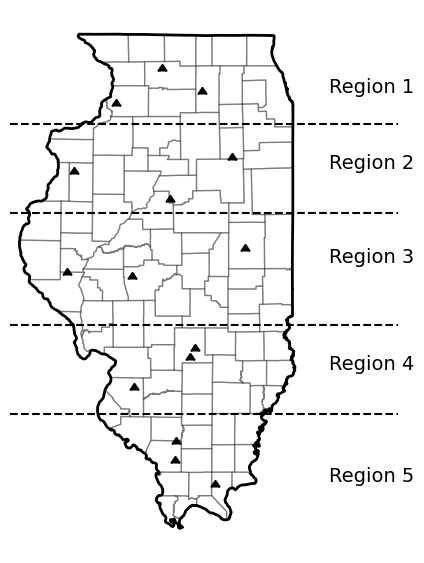

In [6]:
latlon = '''
37.43460084940932, -88.66759597505292
37.700821212674235, -89.2435548308711
38.51851440015194, -89.84017851735969
38.95434946884065, -88.95849314249203
39.80697108921716, -90.8223052308261
40.07488166179474, -88.21830293932575
40.93702486253009, -90.72019907369707
41.10080116132471, -88.41882458225031
41.84156718700616, -88.84794607310978
41.706730579239384, -90.10422288476036
40.62385869530295, -89.31532993080798
39.768350318052505, -89.87076654062763
42.0964490500796, -89.43977874668208
37.72815183651808, -88.46511276027246
37.90992567581568, -89.23546888564626
38.85222978492361, -89.02629310201155
41.74637932707156, -90.015171563878
'''

latlon = pd.read_csv(StringIO(latlon),header=None)

counties = geopandas.read_file("../data/vectors/us_counties_2017.shp")

IL = counties[counties['STATEFP']=="17"]
geometry = [Point(xy) for xy in zip(latlon[1], latlon[0])]

gdf = GeoDataFrame(latlon, geometry=geometry, crs= 4326) 

gdf['location'] = ["Dixon Springs",
"Carbondale",
"Belleville",
"Brownstown",
"Perry",
"Urbana",
"Monmouth",
"Dwight",
"Dekalb",
"Erie",
"Goodfield",
"New Berlin",
"Mt. Morris",
"Harrisburg",
"Elkville",
"St Peter",
"Fenton"]

take_out = ["Fenton","Harrisburg"]

gdf[~gdf['location'].isin(take_out)].sort_values(0)["location"]

f,a = plt.subplots(figsize=(5, 15))
IL.plot(ax=a,facecolor='none', edgecolor='black',lw=1,alpha=.3)
IL.dissolve("STATEFP").plot(ax=a,facecolor='none',lw=2,edgecolor='black')
gdf[~gdf['location'].isin(take_out)].plot(ax=a,color="black",markersize=40,marker=10)
plt.axis('off')
plt.axhline(38.25,color="black",ls="--")
plt.axhline(39.25,color="black",ls="--")
plt.axhline(40.5,color="black",ls="--")
plt.axhline(41.5,color="black",ls="--")
plt.annotate("Region 5",xy=(-87,37.5),fontsize=14)
plt.annotate("Region 4",xy=(-87,38.75),fontsize=14)
plt.annotate("Region 3",xy=(-87,39.95),fontsize=14)
plt.annotate("Region 2",xy=(-87,41),fontsize=14)
plt.annotate("Region 1",xy=(-87,41.85),fontsize=14)
plt.xlim(-91.65,-86)
plt.savefig("../figs/location_map.pdf",dpi=300,bbox_inches="tight")